[[], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [], [],

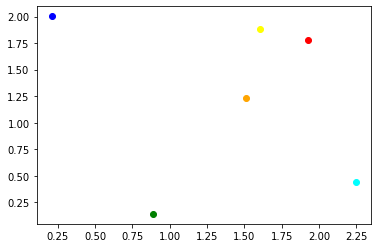

In [ ]:
import math
import numpy as np
import csv
import matplotlib.pyplot as plt
from math import sqrt, floor
from numpy import genfromtxt
from statistics import mean
import copy


data_path = 'sample_data/data.csv'
data = genfromtxt(data_path, delimiter=',')
data_path = 'sample_data/centers.csv'
centers = genfromtxt(data_path, delimiter=',')


cluster = [[1 for j in range(0)] for i in range(data.shape[0])]

temp_cluster = [[1 for j in range(0)] for i in range(data.shape[0])]

print(cluster) 



itrr = 0
while True:
  for clr in range(0, 6):
    temp_cluster[clr].clear()
  for s in data:
    dist = []
    for c in data :
      dist.append(math.sqrt((c[0] - s[0]) ** 2 + (c[1] - s[1]) ** 2))
    min_dist = min(dist)
    index_min = dist.index(min_dist)
    index_data = (np.where(data == s))[0][0]
    if index_data in temp_cluster[index_min]:
      pass
    else:
      temp_cluster[index_min].append(index_data)

  new_center = []
  for L in temp_cluster:
    sum_xi = 0
    sum_yi = 0

    for i in L:
      sum_xi += data[i][0]
      sum_yi += data[i][1]
    avg_x = sum_xi / len(L)
    avg_y = sum_yi / len(L)
    new_center.append([avg_x, avg_y])

  centers = copy.deepcopy(new_center)
  itrr += 1
  if itrr > 1:
    shift = 0
    for x in range(data.shape[0]):
      c = -1
      tc = -1
      if x in cluster[0]:
        c = 0
      elif x in cluster[1]:
        c = 1
      elif x in cluster[2]:
        c = 2
      elif x in cluster[3]:
        c = 3
      elif x in cluster[4]:
        c = 4
      elif x in cluster[5]:
        c = 5

      if x in temp_cluster[0]:
        tc = 0
      elif x in temp_cluster[1]:
        tc = 1
      elif x in temp_cluster[2]:
        tc = 2
      elif x in temp_cluster[3]:
        tc = 3
      elif x in temp_cluster[4]:
        tc = 4
      elif x in temp_cluster[5]:
        tc = 5

      if c != tc:
        shift += 1

    if shift < 10:
      clusters = copy.deepcopy(temp_cluster)
      break
  cluster = copy.deepcopy(temp_cluster)
centers = np.array(centers)
plt.scatter(data[cluster[0]][:, :1], data[cluster[0]][:, 1:2], c='blue')
plt.scatter(data[cluster[1]][:, :1], data[cluster[1]][:, 1:2], c='red')
plt.scatter(data[cluster[2]][:, :1], data[cluster[2]][:, 1:2], c='green')
plt.scatter(data[cluster[3]][:, :1], data[cluster[3]][:, 1:2], c='yellow')
plt.scatter(data[cluster[4]][:, :1], data[cluster[4]][:, 1:2], c='orange')
plt.scatter(data[cluster[5]][:, :1], data[cluster[5]][:, 1:2], c='cyan')
#plt.scatter(centers[:, :1], centers[:, 1:2], c='pink')
plt.show()
 